In [1]:
%load_ext autoreload
%autoreload 2
from geolifeclef.utils import get_spark
from pyspark.sql import functions as F
from geolifeclef.torch.raster.data import RasterDataModel


spark = get_spark()

/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/spark/spark_dataset_converter.py:28: FutureWarning: pyarrow.LocalFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  from pyarrow import LocalFileSystem
24/05/19 03:10:53 WARN Utils: Your hostname, daphne-major resolves to a loopback address: 127.0.1.1; using 172.28.199.217 instead (on interface eth0)
24/05/19 03:10:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 03:10:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... us

In [2]:
local_root = "/mnt/data/geolifeclef-2024/data"
dm = RasterDataModel(
    spark,
    f"{local_root}/processed/metadata_clean/v2",
    [
        f"{local_root}/processed/tiles/pa-train/satellite/v3",
    ],
    ["red", "green", "blue", "nir"],
)
dm.setup()

/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem = pyarrow.localfs
Converting floating-point columns to float32
Converting floating-point columns to float32                                    
The median size 11390479 B (< 50 MB) of the parquet files is too small. Total size: 364465999 B. Increase the median file size by calling df.repartition(n) or df.coalesce(n), which might help improve the performance. Parquet files: file:///mnt/data/tmp/20240519031323-appid-local-1716113455063-6364e0ad-409a-4717-a002-2516340d60ce/part-00022-ce89240b-8469-487c-8ee5-a3c2d9b2ae7f-c000.parquet, ...


In [3]:
dm.train_data.count(), dm.valid_data.count()

(1334401, 149236)

In [4]:
dm.train_data.printSchema()
dm.train_data.show(1, vertical=True, truncate=80)

root
 |-- surveyId: integer (nullable = true)
 |-- labels_sp: vector (nullable = true)
 |-- dataset: string (nullable = true)
 |-- sample_id: long (nullable = true)
 |-- red: vector (nullable = true)
 |-- green: vector (nullable = true)
 |-- blue: vector (nullable = true)
 |-- nir: vector (nullable = true)

-RECORD 0-------------------------------------------------------------------------------------
 surveyId  | 947147                                                                           
 labels_sp | (11255,[812,2608,2891,3375,4675,5868,6915,7230,7871,10073,11140,11188],[1.0,1... 
 dataset   | pa_train                                                                         
 sample_id | 27                                                                               
 red       | [5930736.0,-85145.953125,-238.35287475585938,54020.87890625,3581.513916015625... 
 green     | [5799276.0,-113671.0390625,21665.00390625,21910.51953125,-14805.201171875,349... 
 blue      | [5039208.0,-8

In [5]:
batch = next(dm.train_dataloader())
batch

/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/etl/dataset_metadata.py:402: FutureWarning: Specifying the 'metadata_nthreads' argument is deprecated as of pyarrow 8.0.0, and the argument will be removed in a future version
  dataset = pq.ParquetDataset(path_or_paths, filesystem=fs, validate_schema=False, metadata_nthreads=10)
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/etl/dataset_metadata.py:362: FutureWarning: 'ParquetDataset.common_metadata' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version.
  if not dataset.common_metadata:
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/reader.py:420: FutureWarning: Specifying the 'metadata_nthreads' argument is deprecated as of pyarrow 8.0.0, and the argument will be removed in a future version
  self.dataset = pq.ParquetDataset(dataset_path, filesystem=pyarrow_filesystem,
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-pack

/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partitions' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.partitioning' attribute instead.
  partition_names = self._dataset.partitions.partition_names if self._dataset.partitions else set()
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/arrow_reader_worker.py:291: FutureWarning: 'ParquetDataset.p

{'features': tensor([[[[ 95.7913,  96.3187,  96.9048,  ..., 101.4958, 101.9548, 102.2686],
           [ 95.7328,  96.2192,  96.7594,  ..., 101.3069, 101.7526, 102.0574],
           [ 95.6593,  96.0942,  96.5771,  ..., 101.0673, 101.4964, 101.7898],
           ...,
           [ 99.1515,  99.5161,  99.8993,  ...,   4.5029,   5.0076,   5.3529],
           [ 99.3253,  99.6889, 100.0717,  ...,   4.6452,   5.1556,   5.5047],
           [ 99.5045,  99.8601, 100.2348,  ...,   4.8423,   5.3581,   5.7108]],
 
          [[102.1892, 102.4516, 102.7350,  ...,  93.6793,  94.0192,  94.2519],
           [101.9574, 102.1954, 102.4519,  ...,  93.6565,  93.9815,  94.2040],
           [101.6653, 101.8729, 102.0959,  ...,  93.6236,  93.9299,  94.1397],
           ...,
           [ 98.9348,  99.2014,  99.4752,  ...,   3.3720,   3.8716,   4.2138],
           [ 99.2444,  99.5112,  99.7859,  ...,   3.5862,   4.0947,   4.4428],
           [ 99.5509,  99.8129, 100.0826,  ...,   3.8824,   4.4004,   4.7551]],
 
  

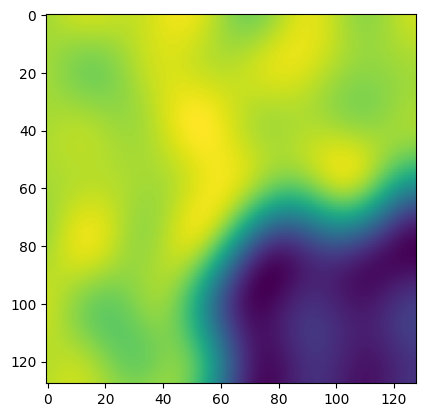

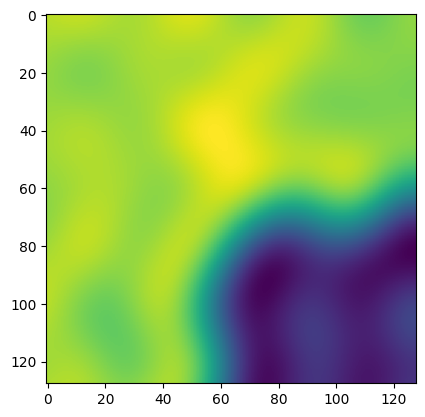

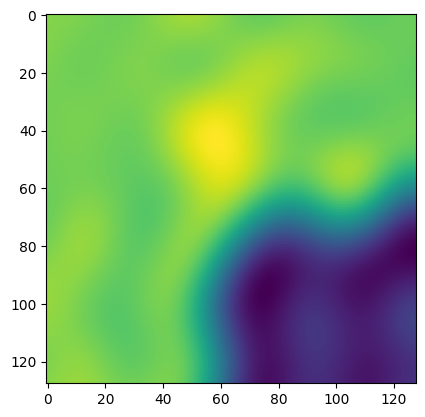

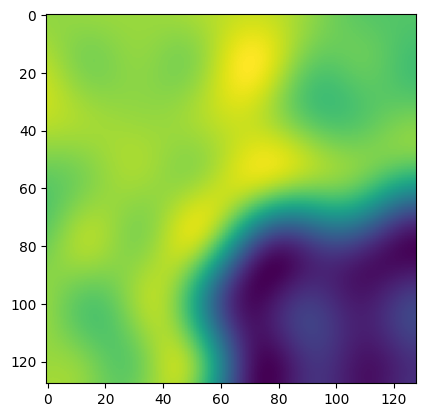

In [6]:
import matplotlib.pyplot as plt

batch["features"].shape
for i in range(4):
    img = batch["features"][0][i]
    plt.imshow(img)
    plt.show()

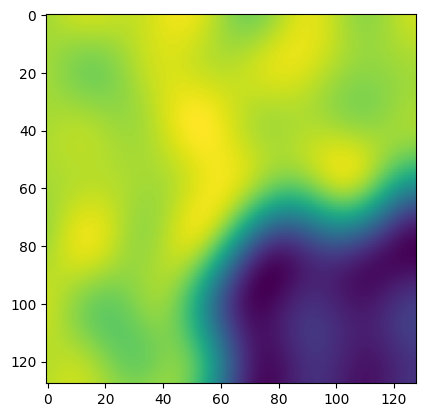

In [7]:
gX = batch["features"][0][0]
plt.imshow(gX)
plt.show()

In [8]:
row = dm.train_data.first()
row.red

DenseVector([5930736.0, -85145.9531, -238.3529, 54020.8789, 3581.5139, 31946.3848, -20198.8457, 11281.4961, -8292.4072, -12519.2656, 65714.0625, -47006.0547, -69759.7188, -18745.7891, 14268.5039, -6030.4707, -75256.9453, -50770.5039, -9612.4629, -5808.9526, 42087.6016, 18155.2812, 21939.9648, -28782.7441, 84636.8281, 33426.3125, -24163.0586, -14119.3574, 2739.7283, -2853.4702, -36950.125, -1698.9855, -23058.6875, -10055.4658, 22061.5039, -440.1954, 10645.2402, 9365.5723, 493.7333, 18089.1406, 20458.8711, 17003.0156, -9931.249, -13403.418, -25753.6016, 17789.875, 9518.2656, 8856.248, -37715.543, 7745.1621, 4658.3652, 13485.0273, 23627.5195, -11968.3125, -2808.0635, -5606.7075, 23998.0723, -15982.3223, -5931.2183, -1890.0471, -6690.4805, -3730.9707, 3996.8232, 18420.5234])

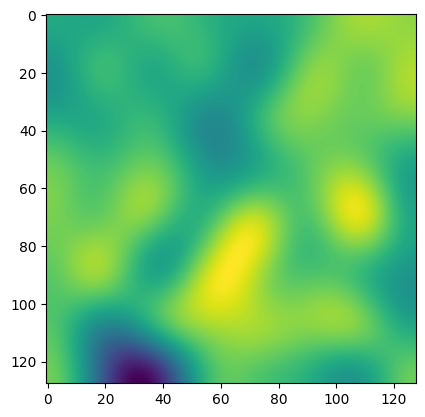

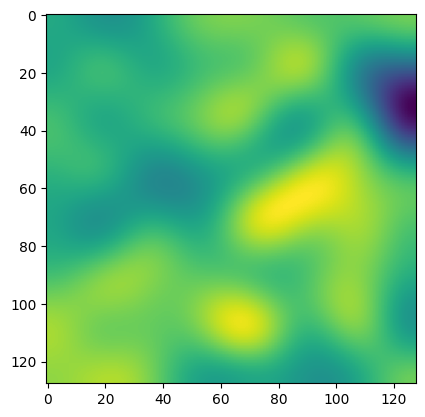

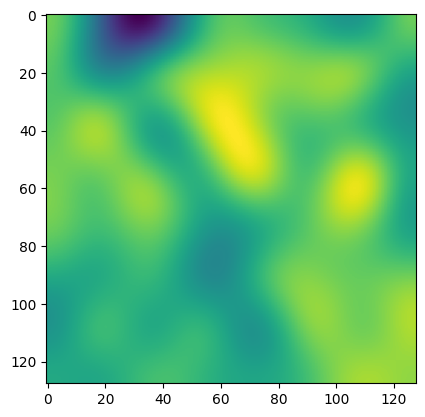

In [34]:
from scipy.fft import idctn
import numpy as np

# https://stackoverflow.com/questions/4983456/how-do-i-rotate-an-image-in-the-frequency-domain

c = row.red.toArray().reshape(8, 8)
pad = np.zeros((128, 128))
pad[:8, :8] = c
gX = idctn(pad)
plt.imshow(gX)
plt.show()

# now transpose the image, this rotates by 90 degrees
pad = np.zeros((128, 128))
pad[:8, :8] = c.T
gX = idctn(pad)
plt.imshow(gX)
plt.show()

# reflect horizontally by flipping along the axis and multiplying odd rows by -1
pad = np.zeros((128, 128))
odd_factor = -np.ones((8, 8))
for i in range(0, 8, 2):
    odd_factor[i] = 1

# reflect across first axis
pad[:8, :8] = c * odd_factor
gX = idctn(pad)
plt.imshow(gX)
plt.show()